In [12]:
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap
from qiskit.circuit import ParameterVector
import numpy as np
from utils.dataset import DriftingLambda
from utils.drifting_covariant_feature_map import DriftingCovariantFeatureMap
import matplotlib.pyplot as plt

In [13]:
plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 28,
                     'axes.labelsize': 28,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

In [14]:
entangler_map = [[0,1],[2,3],[4,5],[6,7],[8,9],[1,2],[3,4],[5,6],[7,8]]
num_features = 20 + 1
fm = DriftingCovariantFeatureMap(feature_dimension=num_features,
                                 entanglement=entangler_map,
                                 single_training_parameter=True)

fm.draw()

┌─────────────────────────────────┐       ░ ┌─────────────────┐ »
q_0: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■─────░─┤ Rz(-2*x_par[1]) ├─»
     ├─────────────────────────────────┤ │     ░ ├─────────────────┤ »
q_1: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■──■──░─┤ Rz(-2*x_par[3]) ├─»
     ├─────────────────────────────────┤    │  ░ ├─────────────────┤ »
q_2: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■──■──░─┤ Rz(-2*x_par[5]) ├─»
     ├─────────────────────────────────┤ │     ░ ├─────────────────┤ »
q_3: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■──■──░─┤ Rz(-2*x_par[7]) ├─»
     ├─────────────────────────────────┤    │  ░ ├─────────────────┤ »
q_4: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■──■──░─┤ Rz(-2*x_par[9]) ├─»
     ├─────────────────────────────────┤ │     ░ ├─────────────────┴┐»
q_5: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■──■──░─┤ Rz(-2*x_par[11]) ├»
     ├─────────────────────────────────┤    │  ░ ├──────────────────┤»
q_6: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■──■──░─┤ Rz(-2*x_par[13]) ├»
     ├─────────────────────────────────┤ │     ░ ├──────────────────┤»
q_7: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■──■──░─┤ Rz(-2*x_par[15]) ├»
     ├─────────────────────────────────┤    │  ░ ├──────────────────┤»
q_8: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■──■──░─┤ Rz(-2*x_par[17]) ├»
     ├─────────────────────────────────┤ │     ░ ├──────────────────┤»
q_9: ┤ Ry(-x_par[20] + θ_par[0] + π/2) ├─■─────░─┤ Rz(-2*x_par[19]) ├»
     └─────────────────────────────────┘       ░ └──────────────────┘»
«     ┌─────────────────┐ 
«q_0: ┤ Rx(-2*x_par[0]) ├─
«     ├─────────────────┤ 
«q_1: ┤ Rx(-2*x_par[2]) ├─
«     ├─────────────────┤ 
«q_2: ┤ Rx(-2*x_par[4]) ├─
«     ├─────────────────┤ 
«q_3: ┤ Rx(-2*x_par[6]) ├─
«     ├─────────────────┤ 
«q_4: ┤ Rx(-2*x_par[8]) ├─
«     ├─────────────────┴┐
«q_5: ┤ Rx(-2*x_par[10]) ├
«     ├──────────────────┤
«q_6: ┤ Rx(-2*x_par[12]) ├
«     ├──────────────────┤
«q_7: ┤ Rx(-2*x_par[14]) ├
«     ├──────────────────┤
«q_8: ┤ Rx(-2*x_par[16]) ├
«     ├──────────────────┤
«q_9: ┤ Rx(-2*x_par[18]) ├
«     └──────────────────┘

## Stationary Test

In [15]:
from pegasos.pegasos_qka import PegasosQKA
from kernels.statevector_pseudo_kernel import StatevectorPseudoKernel

np.random.seed(42)

stationary_values = []
stationary_y_true = []
test_acc = []
support_vecs = []


initial_lambda = np.pi/2
ds = DriftingLambda(step_size=0.0, initial_lambda=initial_lambda, test_size=25) # stationary lambda

Xt, yt = ds.get_test_set()

def stationary_callback(step, value, updated, x_step, y_step, qka):
    stationary_values.append(value)
    stationary_y_true.append(y_step)
    test_acc.append(qka.score(Xt, yt))
    support_vecs.append(sum(qka._alphas))
    


kernel = StatevectorPseudoKernel(feature_map=fm, num_training_parameters=1)
qka = PegasosQKA(kernel, C=500, spsa_calibration=False,learning_rate=0.1, steps_used=None, use_theta_history=True,callback=stationary_callback)

In [16]:
qka.fit(ds, num_steps=120)
thetas_1 = qka._thetas

Step 100/120.


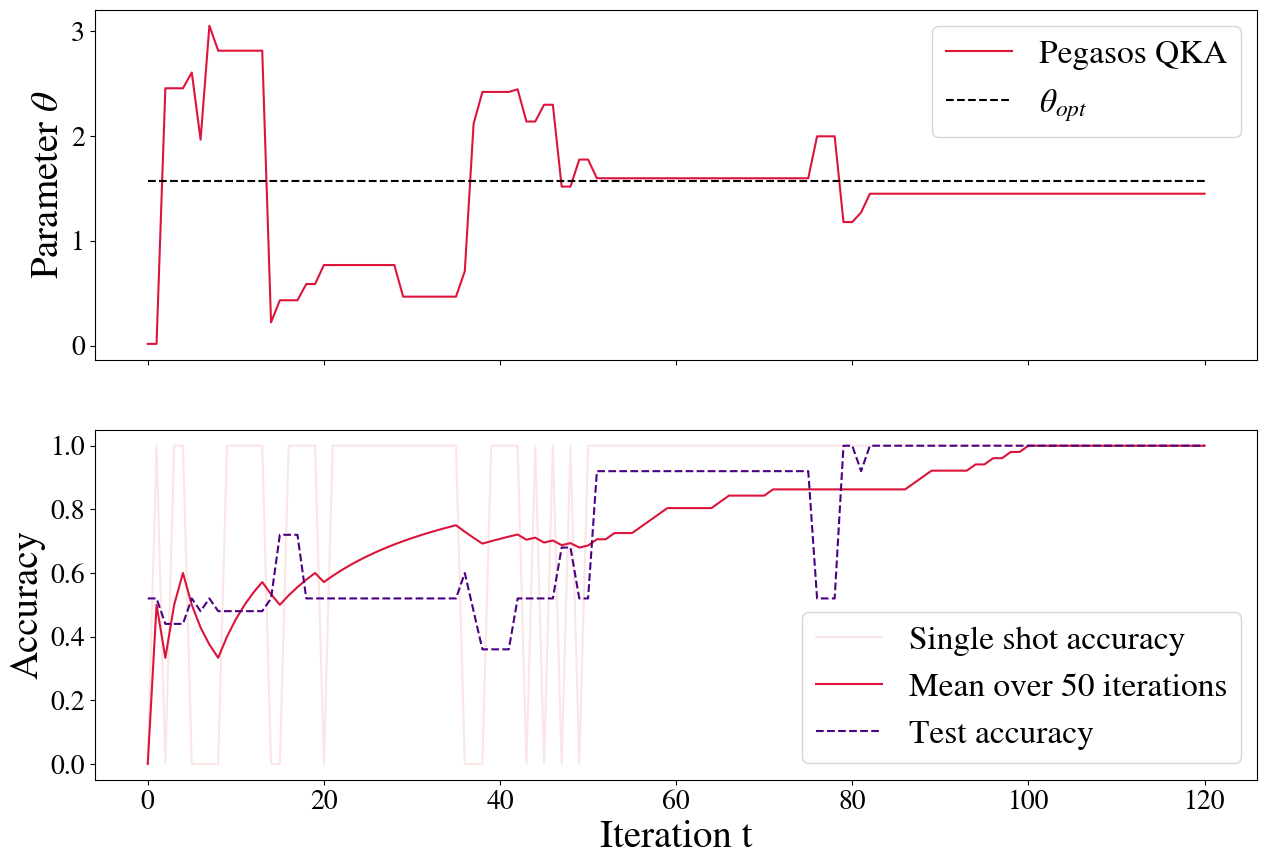

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2,1,figsize=(15,10),sharex=True)


axs[0].set_ylabel(r'Parameter $\theta$')

axs[0].plot(np.array(thetas_1).flatten()[10:]% np.pi,label="Pegasos QKA",color="crimson")
true_lambda = initial_lambda * np.ones(len(thetas_1)) 
axs[0].plot(true_lambda[10:],label=r'$\theta_{opt}$',color="black",linestyle='--')
axs[0].legend()

stationary_values = np.array(stationary_values).reshape(-1)
stationary_accuracy = np.sign(stationary_values) == stationary_y_true
axs[1].plot(stationary_accuracy, alpha=0.2,color="lightcoral", label="Single shot accuracy")


def rolling_mean(acc, bin=50):
    means = np.zeros(acc.shape)
    for i in range(len(means)):
        means[i] = np.mean(acc[max(0, i - bin) : i + 1])
    return means

axs[1].plot(rolling_mean(stationary_accuracy), color="crimson", label="Mean over 50 iterations")
axs[1].plot(test_acc, label="Test accuracy",color="indigo",linestyle="dashed")
axs[1].set_ylabel("Accuracy")
axs[1].legend(loc="lower right")
axs[1].set_xlabel('Iteration t')


plt.savefig('plots/stationary_lambda.png',dpi=200)